# N uptake analysis for RhizCG 2013

## Set Variables

In [1]:
workDir = '/home/bryan/RhizCG/figures/'
fullData = '/home/bryan/RhizCG/data/MiSeq_amplicon/PlotData.txt'

#Init

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(dplyr)
library(pbkrtest)
library(gridExtra)
library(multcomp)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Matrix

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lmerTest’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lme4’:

    lmer


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:stats’:

    step


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/p

### Read plant master table 

In [4]:
%%R -i fullData -i workDir
setwd(workDir)
Master = read.table(fullData, header = TRUE)
Master$Rep = as.factor(Master$Rep)
colnames(Master)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

# Loop through dates to test for N uptake differences on a sampling date

In [11]:
%%R
Master %>% group_by(Plant, Treatment) %>%
        summarise(N = mean(tN_p),
                 st_dev = sd(tN_p)) %>% print(n=60)

Source: local data frame [54 x 4]
Groups: Plant [?]

    Plant Treatment         N     st_dev
   (fctr)    (fctr)     (dbl)      (dbl)
1  75-062      Nneg 1.2180833 0.31876256
2  75-062      Npos 1.1363772 0.31101464
3   ABUTH      Nneg 1.2447473 0.15213099
4   ABUTH      Npos 1.3027344 0.69225888
5   AMAPO      Nneg 1.2339784 0.35356767
6   AMAPO      Npos 2.1634450 0.45455468
7     B73      Nneg 1.4658371 0.43831277
8     B73      Npos 2.1854472 0.36386498
9     B97      Nneg 1.2427987 0.37921594
10    B97      Npos 1.7268705 0.57992872
11   BARE      Nneg        NA         NA
12   BARE      Npos        NA         NA
13  ECHCG      Nneg 0.7626846 0.30846186
14  ECHCG      Npos 1.3551215 0.38207815
15  ELCOR      Nneg 3.0591305 1.33562535
16  ELCOR      Npos 3.4551155 1.24730669
17  ERATE      Nneg 1.0038014 0.28892936
18  ERATE      Npos 1.3586427 0.31562654
19  FAGES      Nneg 0.3163340 0.03535124
20  FAGES      Npos 0.3991294 0.19024477
21  GLYMA      Nneg 0.7137376 0.16816490
22  

In [18]:
%%R
DATE = c("53", "57", "72", "79", "84", "88")

 for(d in DATE){ 
    d %>% print
    Sub = filter(Master, DAP == d)

   m = lmer(tN_p ~ Plant  + Treatment + Plant:Treatment +
           (1|Rep) + (1|Rep:Plant), 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}
     

[1] "53"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant           0.53534 0.53534     1     3   7.587 0.070479 . 
Treatment       2.31619 2.31619     1     6  32.825 0.001227 **
Plant:Treatment 0.11359 0.11359     1     6   1.610 0.251518   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "57"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant           0.85114 0.85114     1     3  7.3705 0.07286 .
Treatment       0.06524 0.06524     1     6  0.5649 0.48071  
Plant:Treatment 0.01945 0.01945     1     6  0.1684 0.69580  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "72"
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF Den

# Analysis of growth residuals

In [46]:
%%R

m = lmer(Resid_logN ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant), 
          data = Master, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value   Pr(>F)    
Plant           15.2005  0.6334    24    72   9.171 1.09e-13 ***
Treatment        3.6852  3.6852     1    75  53.362 2.48e-10 ***
Plant:Treatment  2.2132  0.0922    24    75   1.335   0.1724    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## within a fertilzation treatment

In [49]:
%%R
Sub = filter(Master, Treatment == "Nneg")
m = lmer(Resid_logN ~ Plant + (1|Rep), 
          data = Sub, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 15.068 0.62781    24    72  6.7168 1.456e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Nneg just annuals or maize

In [51]:
%%R
Sub = filter(Master, Treatment == "Nneg" & Type != "Maize")
m = lmer(Resid_logN ~ Plant + (1|Rep), 
          data = Sub, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 4.8366 0.43969    11    33   4.496 0.0003741 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
%%R
Sub = filter(Master, Treatment == "Nneg" & Type == "Maize")
m = lmer(Resid_logN ~ Plant + (1|Rep), 
          data = Sub, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Plant  1.233 0.10275    12    36  1.1205 0.3745


### Npos just annuals or maize

In [53]:
%%R
Sub = filter(Master, Treatment == "Npos" & Type != "Maize")
m = lmer(Resid_logN ~ Plant + (1|Rep), 
          data = Sub, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 8.9063 0.80966    11    33  5.0609 0.0001358 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
%%R
Sub = filter(Master, Treatment == "Npos" & Type == "Maize")
m = lmer(Resid_logN ~ Plant + (1|Rep), 
          data = Sub, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Plant 1.8309 0.15258    12    36  2.4682 0.01806 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [50]:
%%R
Sub = filter(Master, Treatment == "Npos")
m = lmer(Resid_logN ~ Plant + (1|Rep), 
          data = Sub, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 18.931  0.7888    24    72  7.2045 3.121e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Covariate relationship with N uptake residuals

In [57]:
%%R
m = lmer(Resid_logN ~ Treatment +  
         CB_rel + LAP_rel +
         LAP_rel:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Master, na.rm = TRUE)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: Resid_logN ~ Treatment + CB_rel + LAP_rel + LAP_rel:Treatment +  
    (1 | Rep) + (1 | Rep:Plant)
   Data: Master

REML criterion at convergence: 202

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.99377 -0.42113 -0.08513  0.47634  1.85305 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.19439  0.4409  
 Rep       (Intercept) 0.00000  0.0000  
 Residual              0.06692  0.2587  
Number of obs: 176, groups:  Rep:Plant, 88; Rep, 4

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)            -0.249132   0.251118 125.310000  -0.992   0.3231  
TreatmentNpos           0.627428   0.293850  93.370000   2.135   0.0354 *
CB_rel                  0.121385   0.083434 110.600000   1.455   0.1485  
LAP_rel                 0.005511   0.231317 118.250000   0.024   0.9810  
Treat

# Graph enzyme activity in bare vs rhizosphere soils

In [6]:
%%R
e_sel = !is.na(Master$BX_dif)
Enz = Master[e_sel,]


In [7]:
%%R
#calculate means of Bare soil vs Planted treatments
Enz$Planted = as.factor(ifelse(Enz$Plant == "BARE", "Bare Soil", "Rhizosphere"))

by_treat = group_by(Enz, Planted, Treatment)
Emeans = summarize(by_treat,
              N = length(BX_activity_g),
                   bx.m = mean(BX_activity_g),
                   bx.se = sd(BX_activity_g)/sqrt(length(BX_activity_g)),
                  cb.m = mean(CB_activity_g),
                   cb.se = sd(CB_activity_g)/sqrt(length(CB_activity_g)),
                  lap.m = mean(LAP_activity_g),
                   lap.se = sd(LAP_activity_g)/sqrt(length(LAP_activity_g)),
                    nag.m = mean(NAG_activity_g),
                  nag.se = sd(NAG_activity_g)/sqrt(length(NAG_activity_g)))
head(Emeans)

Source: local data frame [4 x 11]
Groups: Planted [2]

      Planted Treatment     N     bx.m     bx.se     cb.m     cb.se    lap.m
       (fctr)    (fctr) (int)    (dbl)     (dbl)    (dbl)     (dbl)    (dbl)
1   Bare Soil      Nneg    32 15.17175 0.6498354 14.29288 0.5461105 126.6001
2   Bare Soil      Npos    32 14.82994 0.7252128 13.78256 0.5471938 134.4734
3 Rhizosphere      Nneg    88 22.32679 0.5840031 20.95171 0.5609904 150.1426
4 Rhizosphere      Npos    88 24.84942 0.6868409 23.96746 0.6087010 158.9072
Variables not shown: lap.se (dbl), nag.m (dbl), nag.se (dbl)


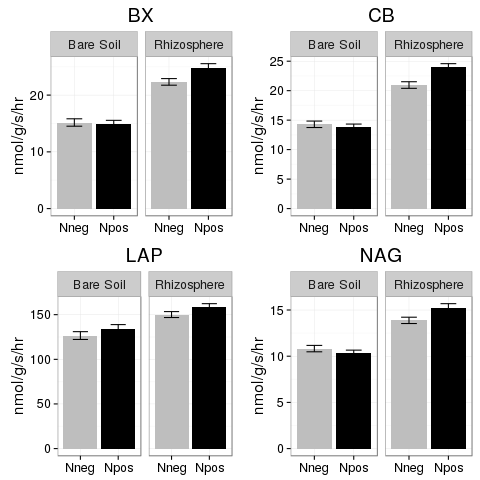

In [8]:
%%R

P1 = ggplot(Emeans, aes(x = Treatment, y = bx.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = bx.m,
                  ymin = bx.m - bx.se, ymax = bx.m + bx.se), width = 0.4)+
        ylab("nmol/g/s/hr")+
        ggtitle("BX") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")
        

P2 = ggplot(Emeans, aes(x = Treatment, y = cb.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = cb.m,
                  ymin = cb.m - cb.se, ymax = cb.m + cb.se), width = 0.4)+
        ylab("nmol/g/s/hr")+
        ggtitle("CB") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")

P3 = ggplot(Emeans, aes(x = Treatment, y = lap.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = lap.m,
                  ymin = lap.m - lap.se, ymax = lap.m + lap.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank()) +
        ylab("nmol/g/s/hr")+
        ggtitle("LAP") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")

P4 = ggplot(Emeans, aes(x = Treatment, y = nag.m, fill = Treatment))  +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = nag.m,
                  ymin = nag.m - nag.se, ymax = nag.m + nag.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank())+ 
        ylab("nmol/g/s/hr") +
        ggtitle("NAG") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")


#print to file
#pdf(file = "enzyme_rhizosphere_xTreatment.pdf")
grid.arrange(P1, P2, P3, P4, ncol = 2)
#dev.off

## Model

Notes: Rep has small random effect for BX, CB and NAG once nested Rep:Plant term is added.  However, REP contains considerable informatiomn for LAP.  Also possible to use Plot variable as random effect to avoid confusion. 

Residuals checked.  With exception of few outliers of predicted values residuals are normally and evenly distributed.   

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                   Sum Sq Mean Sq NumDF   DenDF F.value    Pr(>F)    
Planted           224.464 224.464     1  49.291 15.0614 0.0003094 ***
Treatment          55.804  55.804     1 146.376  3.7444 0.0549129 .  
Planted:Treatment  96.272  96.272     1 146.376  6.4598 0.0120750 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
PlantedTreat 502.11  167.37     3 138.76   11.23 1.212e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


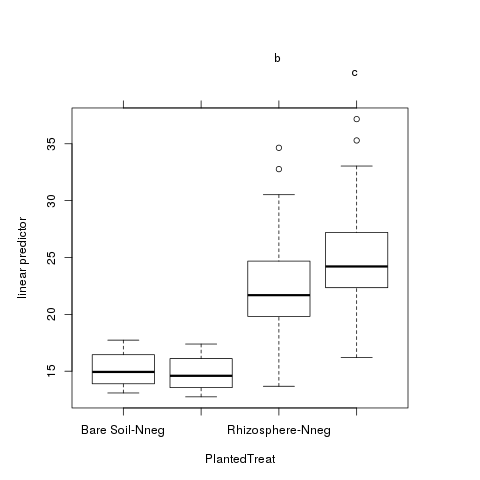

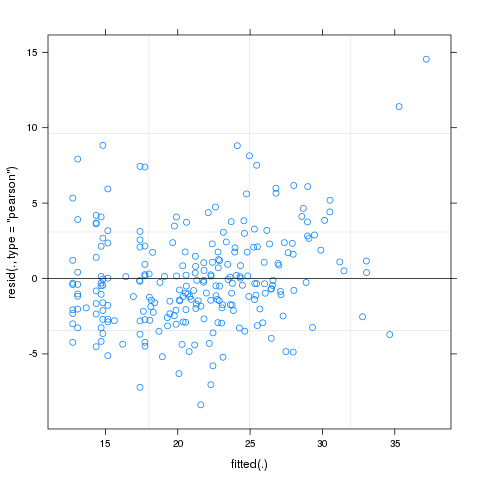

In [9]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(BX_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(BX_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
        

plot(m)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                   Sum Sq Mean Sq NumDF   DenDF F.value    Pr(>F)    
Planted           279.861 279.861     1  42.544 20.0037 5.667e-05 ***
Treatment          73.652  73.652     1 146.614  5.2644  0.023185 *  
Planted:Treatment 145.883 145.883     1 146.614 10.4274  0.001532 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
PlantedTreat 677.69   225.9     3 129.89  16.146 5.589e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


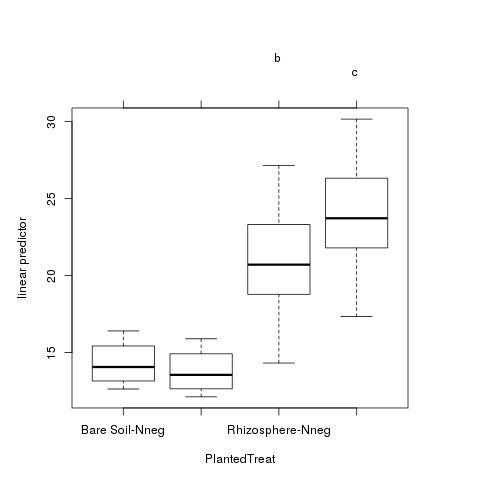

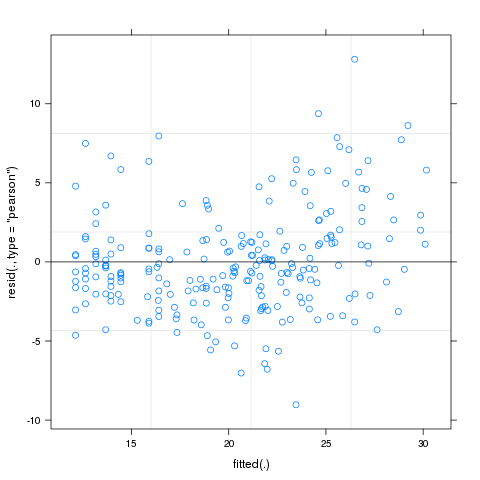

In [10]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(CB_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(CB_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
plot(m)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                  Sum Sq Mean Sq NumDF   DenDF F.value   Pr(>F)   
Planted           1958.8  1958.8     1  46.527  4.6462 0.036328 * 
Treatment         3248.0  3248.0     1 146.501  7.7042 0.006229 **
Planted:Treatment    9.3     9.3     1 146.501  0.0221 0.881998   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value   Pr(>F)   
PlantedTreat 6275.1  2091.7     3 135.34  4.9614 0.002679 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


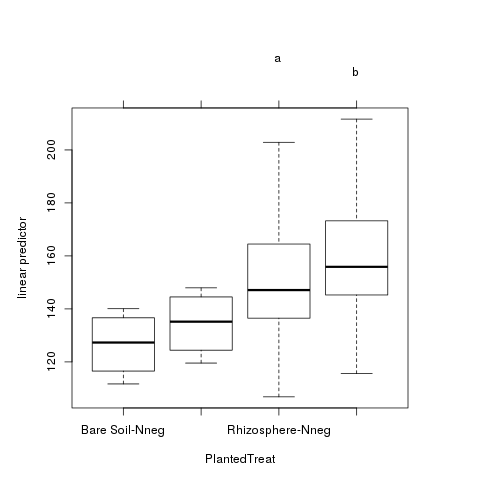

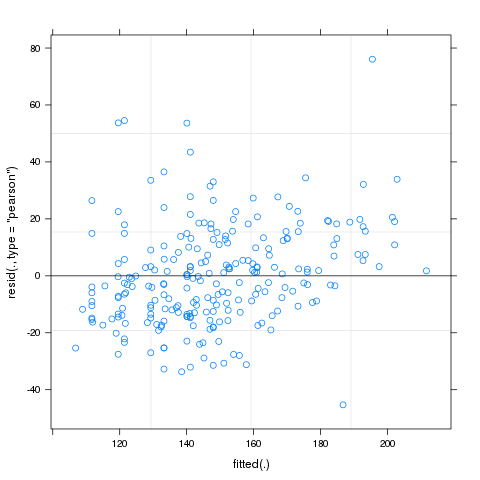

In [11]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(LAP_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(LAP_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
       # summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
plot(m)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                  Sum Sq Mean Sq NumDF   DenDF F.value   Pr(>F)   
Planted           59.651  59.651     1  43.815  9.2555 0.003958 **
Treatment          8.259   8.259     1 146.528  1.2815 0.259465   
Planted:Treatment 41.918  41.918     1 146.528  6.5041 0.011789 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
PlantedTreat 144.65  48.216     3 131.69  7.4812 0.0001158 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


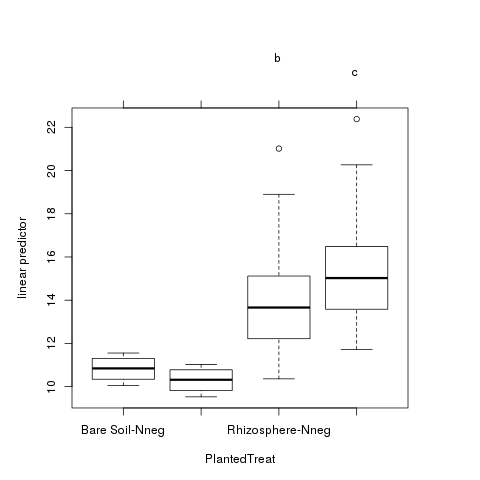

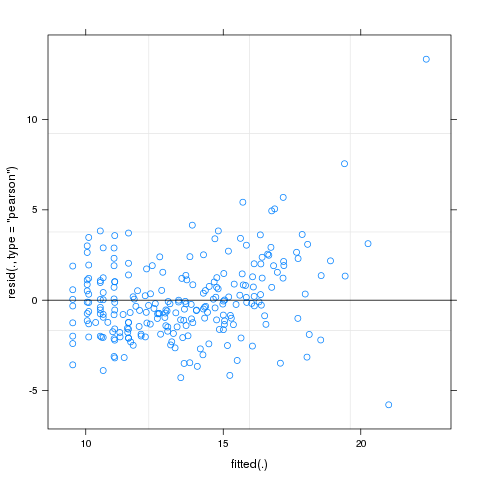

In [12]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(NAG_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(NAG_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
plot(m)

# Model rhizosphere effect

## First with just treatment effects

In [13]:
%%R
PlantEnz = Enz[Enz$Planted == "Rhizosphere",]
PlantEnz$Rep = as.factor(PlantEnz$Rep)
PlantEnz$PlantTreat = as.factor(paste(PlantEnz$Plant, PlantEnz$Treatment, sep = "-"))

### BX

In [14]:
%%R
colnames(PlantEnz)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           1.42457 0.06784    21    63   2.620   0.00171 ** 
Treatment       0.91533 0.91533     1    66  35.353 1.149e-07 ***
Plant:Treatment 0.90228 0.04297    21    66   1.659   0.06183 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


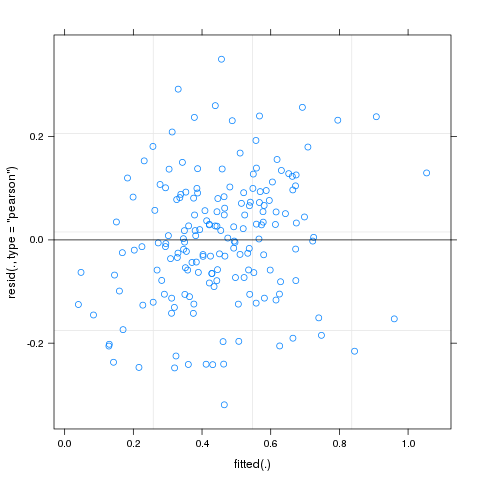

In [15]:
%%R
m = lmer(log(BX_rel) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           4.1264  0.1965    21    63   1.892   0.02725 *  
Treatment       3.8665  3.8665     1    66  37.229 6.176e-08 ***
Plant:Treatment 3.3586  0.1599    21    66   1.540   0.09433 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


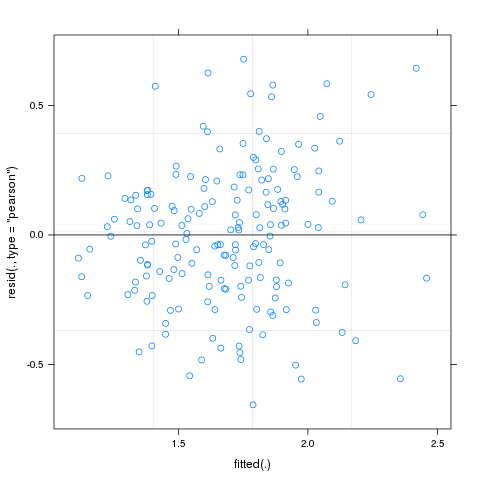

In [16]:
%%R
m = lmer(CB_rel ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
        #summary(m)

        

plot(m)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Correlation matrix not shown by default, as p = 44 > 20.
Use print(., correlation=TRUE)  or
	 vcov(.)	 if you need it


  res = super(Function, self).__call__(*new_args, **new_kwargs)


Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: LAP_rel ~ Plant + Treatment + Plant:Treatment + (1 | Rep) + (1 |  
    Rep:Plant)
   Data: PlantEnz

REML criterion at convergence: -49.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4005 -0.4863  0.0017  0.4665  3.2209 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.007711 0.08781 
 Rep       (Intercept) 0.003183 0.05642 
 Residual              0.017973 0.13406 
Number of obs: 176, groups:  Rep:Plant, 88; Rep, 4

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                 1.208871   0.084951  79.850000  14.230  < 2e-16 ***
PlantABUTH                 -0.165269   0.113323 116.770000  -1.458  0.14742    
PlantAMAPO                 -0.018708   0.113323 116.770000  -0.165  0.86916    
PlantB73                   -0.156462   0.113323 116.770000  -1.381  0.17002  

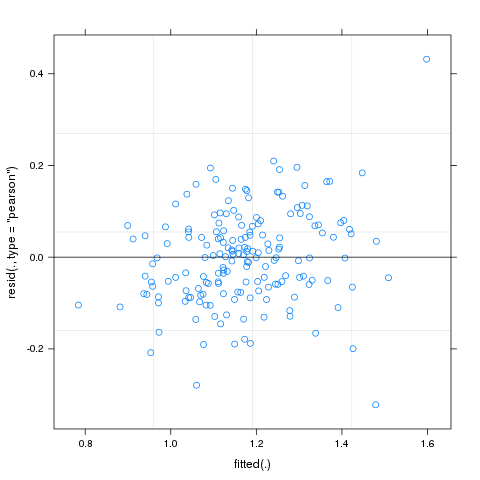

In [17]:
%%R
m = lmer(LAP_rel ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
            #summary(m)
       
plot(m)



Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: log(NAG_rel) ~ Plant + Treatment + Plant:Treatment + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: PlantEnz

REML criterion at convergence: 12.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3183 -0.4240  0.0413  0.4553  3.4566 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.009159 0.09570 
 Rep       (Intercept) 0.002722 0.05217 
 Residual              0.031250 0.17678 
Number of obs: 176, groups:  Rep:Plant, 88; Rep, 4

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)                 0.175565   0.103840 106.180000   1.691  0.09382 . 
PlantABUTH                  0.286991   0.142142 121.410000   2.019  0.04569 * 
PlantAMAPO                 -0.045839   0.142142 121.410000  -0.322  0.74764   
PlantB73                    0.115132   0.142142 121.410000   0.810  0.41954  

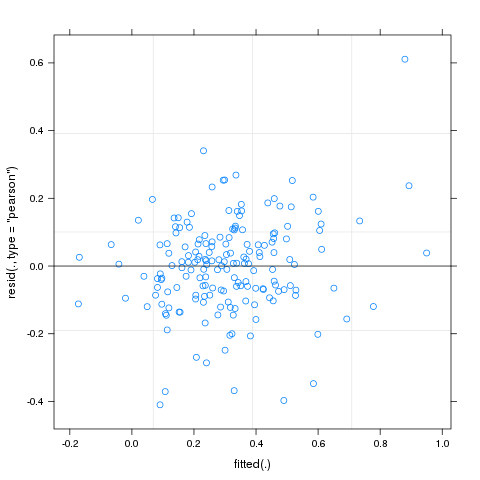

In [18]:
%%R
m = lmer(log(NAG_rel) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

In [19]:
%%R
by_treat = group_by(PlantEnz, Plant, Treatment)
Emeans = summarize(by_treat,
              N = length(BX_rel),
                   bx.m = mean(BX_rel),
                   bx.se = sd(BX_rel)/sqrt(length(BX_rel)),
                  cb.m = mean(CB_rel),
                   cb.se = sd(CB_rel)/sqrt(length(CB_rel)),
                  lap.m = mean(LAP_rel),
                   lap.se = sd(LAP_rel)/sqrt(length(LAP_rel)),
                    nag.m = mean(NAG_rel),
                  nag.se = sd(NAG_rel)/sqrt(length(NAG_rel)))
head(Emeans)

Source: local data frame [6 x 11]
Groups: Plant [3]

   Plant Treatment     N     bx.m     bx.se     cb.m     cb.se    lap.m
  (fctr)    (fctr) (int)    (dbl)     (dbl)    (dbl)     (dbl)    (dbl)
1 75-062      Nneg     4 1.410555 0.2355612 1.491043 0.2796418 1.208871
2 75-062      Npos     4 1.731261 0.1529143 1.919034 0.1769265 1.236364
3  ABUTH      Nneg     4 1.591899 0.1777430 1.451152 0.1416835 1.043602
4  ABUTH      Npos     4 2.632162 0.3406024 2.419472 0.2616576 1.332508
5  AMAPO      Nneg     4 1.785122 0.2641789 1.718336 0.2163452 1.190163
6  AMAPO      Npos     4 1.722847 0.1405241 1.699689 0.1462254 1.211164
Variables not shown: lap.se (dbl), nag.m (dbl), nag.se (dbl)


png 
  2 


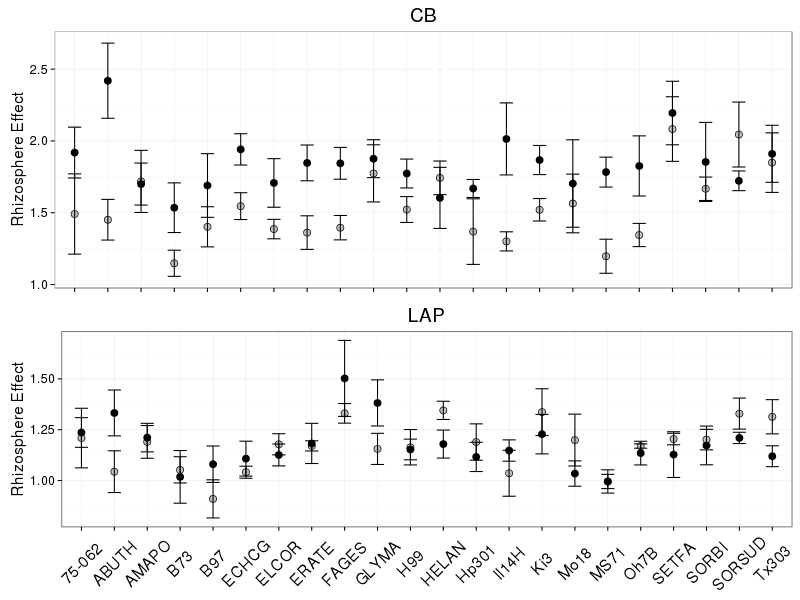

In [20]:
%%R -w 800 -h 600
P1 = ggplot(Emeans, aes(x = Plant, y = cb.m, fill = Treatment)) +
        geom_point(pch = 21, size = 3) + 
        geom_errorbar(data = Emeans, aes(y = cb.m,
                  ymin = cb.m - cb.se, ymax = cb.m + cb.se), width = 0.4)+
        scale_fill_manual(values = c("grey","black")) +
        ylab("Rhizosphere Effect")+
        ggtitle("CB") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none") +
        theme(axis.text.x  = element_blank())
P2 = ggplot(Emeans, aes(x = Plant, y = lap.m, fill = Treatment)) +
        geom_point(pch = 21, size = 3) + 
        geom_errorbar(data = Emeans, aes(y = lap.m,
                  ymin = lap.m - lap.se, ymax = lap.m + lap.se), width = 0.4)+
        scale_fill_manual(values = c("grey","black")) +
        ylab("Rhizosphere Effect")+
        ggtitle("LAP") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none") +
        theme(axis.text.x  = element_text(angle=45, vjust=0.5, size=16))

P = grid.arrange(P1, P2, ncol = 1)

pdf(file = "/home/bryan/RhizCG/figures/enzymes_plant.pdf", width = 10, height = 8)
grid.arrange(P1, P2, ncol = 1)
dev.off()

In [21]:
%%R

P1 = ggplot(Emeans, aes(x = Treatment, y = bx.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_point(fill = Treatment) + 
        geom_errorbar(data = Emeans, aes(y = bx.m,
                  ymin = bx.m - bx.se, ymax = bx.m + bx.se), width = 0.4)+
        ylab("Rhizosphere Effect")+
        ggtitle("BX") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")
        

P2 = ggplot(Emeans, aes(x = Treatment, y = cb.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = cb.m,
                  ymin = cb.m - cb.se, ymax = cb.m + cb.se), width = 0.4)+
        ylab("Rhizosphere Effect")+
        ggtitle("CB") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")

P3 = ggplot(Emeans, aes(x = Treatment, y = lap.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = lap.m,
                  ymin = lap.m - lap.se, ymax = lap.m + lap.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank()) +
        ylab("Rhizosphere Effect")+
        ggtitle("LAP") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")

P4 = ggplot(Emeans, aes(x = Treatment, y = nag.m, fill = Treatment))  +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = nag.m,
                  ymin = nag.m - nag.se, ymax = nag.m + nag.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank())+ 
        ylab("Rhizosphere Effect") +
        ggtitle("NAG") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")


#print to file
#pdf(file = "enzyme_rhizosphere_xTreatment.pdf")
grid.arrange(P1, P2, P3, P4, ncol = 2)
#dev.off


Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomPoint,  : 
  object 'Treatment' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomPoint,  : 
  object 'Treatment' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## Is N treatment effect due to fertilizer effects on plant growth or releiving N limitation in the rhizosphere

In [22]:
%%R
PlantEnz.o = filter(PlantEnz, InorganicN < 45)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: log(BX_activity_g) ~ Plant + Resid_logN + InorganicN + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: PlantEnz.o

REML criterion at convergence: 4.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.43540 -0.55001 -0.09967  0.50843  2.14011 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.01160  0.1077  
 Rep       (Intercept) 0.01009  0.1005  
 Residual              0.02875  0.1696  
Number of obs: 85, groups:  Rep:Plant, 44; Rep, 4

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  3.061733   0.103436 24.280000  29.600  < 2e-16 ***
PlantABUTH  -0.288167   0.130719 38.510000  -2.204  0.03354 *  
PlantAMAPO  -0.048051   0.138676 42.550000  -0.346  0.73068    
PlantB97     0.085295   0.114198 28.630000   0.747  0.46121    
PlantECHCG  -0.132463   0.125962 37.490000  -1.052  0.29971  

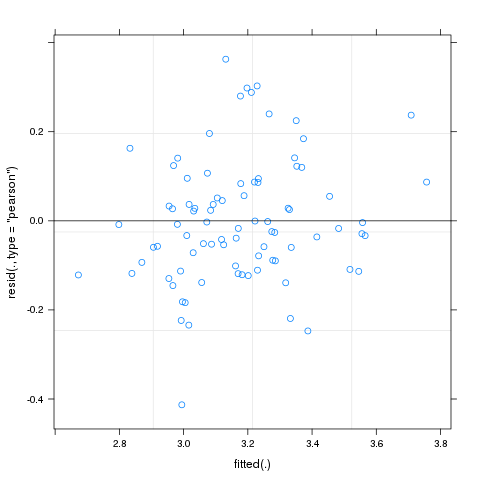

In [23]:
%%R
m = lmer(log(BX_activity_g) ~ Plant + Resid_logN + InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz.o)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

#1-var(residuals(m))/(var(model.response(model.frame(m))))

# r2.corr.mer <- function(m) {
#   lmfit <-  lm(model.response(model.frame(m)) ~ fitted(m))
#   summary(lmfit)$r.squared
# }
# r2.corr.mer(m) %>% print

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: CB_activity_g ~ Plant + Resid_logN + InorganicN + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: PlantEnz.o

REML criterion at convergence: 463

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2994 -0.5494 -0.1766  0.3815  2.2890 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept)  1.431   1.196   
 Rep       (Intercept)  2.425   1.557   
 Residual              20.968   4.579   
Number of obs: 85, groups:  Rep:Plant, 44; Rep, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  20.4001     2.1539 34.3400   9.471 4.16e-11 ***
PlantABUTH   -2.0608     2.9001 37.2200  -0.711   0.4818    
PlantAMAPO   -0.8995     3.1111 41.1300  -0.289   0.7739    
PlantB97      1.3803     2.4479 27.2300   0.564   0.5774    
PlantECHCG    0.1243     2.7913 37.6800   0.045   0.9647    
PlantERATE   -1.1901     2.441

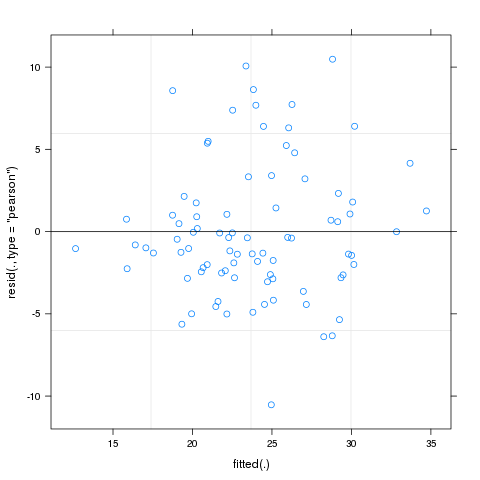

In [24]:
%%R
m = lmer(CB_activity_g ~ Plant + Resid_logN + InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz.o)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: LAP_activity_g ~ Plant + InorganicN + (1 | Rep) + (1 | Rep:Plant)
   Data: PlantEnz.o

REML criterion at convergence: 688.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.16380 -0.47766  0.03894  0.53818  2.39649 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 206.7    14.38   
 Rep       (Intercept) 227.3    15.08   
 Residual              304.9    17.46   
Number of obs: 85, groups:  Rep:Plant, 44; Rep, 4

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 143.2201    12.5166  14.7900  11.442 9.58e-09 ***
PlantABUTH  -61.6382    14.6119  35.8500  -4.218  0.00016 ***
PlantAMAPO  -18.2507    13.4247  28.1300  -1.359  0.18479    
PlantB97     12.9139    13.4093  28.0300   0.963  0.34376    
PlantECHCG  -39.2835    14.0303  32.7400  -2.800  0.00851 ** 
PlantERATE   -3.7645    13.400

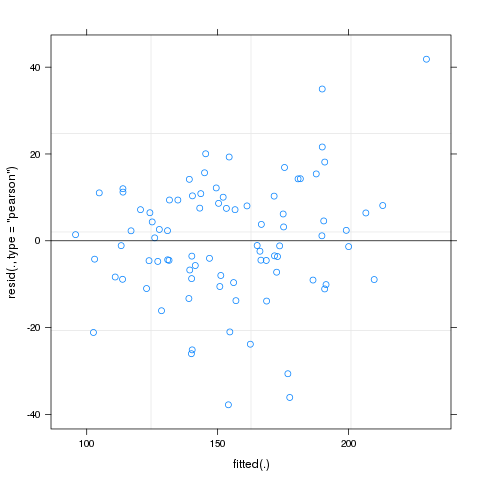

In [25]:
%%R
m = lmer(LAP_activity_g ~ Plant + InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz.o)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: NAG_activity_g ~ Plant + InorganicN + (1 | Rep) + (1 | Rep:Plant)
   Data: PlantEnz.o

REML criterion at convergence: 392.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.18784 -0.52012 -0.06283  0.48811  2.53548 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 2.924    1.710   
 Rep       (Intercept) 0.000    0.000   
 Residual              6.272    2.504   
Number of obs: 85, groups:  Rep:Plant, 44; Rep, 4

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 12.31662    1.30717 37.74000   9.422 1.86e-11 ***
PlantABUTH   1.14627    1.91930 41.28000   0.597 0.553613    
PlantAMAPO  -3.99879    1.74438 32.38000  -2.292 0.028524 *  
PlantB97     3.19475    1.74210 32.27000   1.834 0.075915 .  
PlantECHCG  -4.12152    1.83573 38.01000  -2.245 0.030655 *  
PlantERATE  -1.39948    1.7408

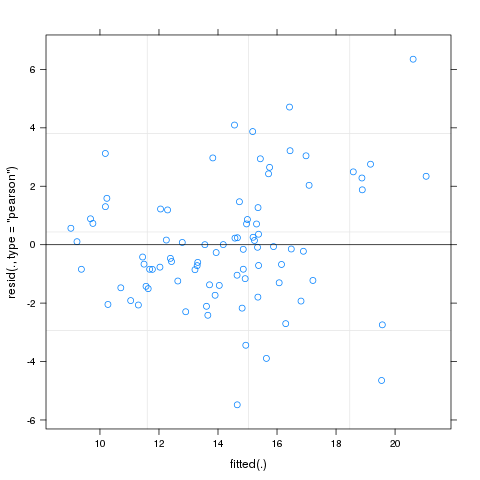

In [26]:
%%R
m = lmer(NAG_activity_g ~ Plant + InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz.o)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

### Graph 

png 
  2 


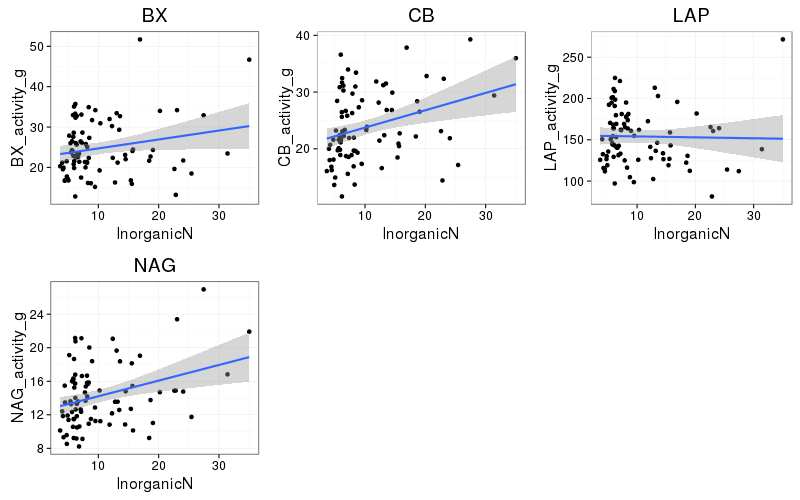

In [27]:
%%R -w 800 -h 500

p = ggplot(PlantEnz.o, aes(InorganicN, BX_activity_g), pch = 21) + 
    geom_point() + 
    stat_smooth(method = "lm") + 
    theme_bw(base_size = 16) +
    ggtitle("BX")

p1 = ggplot(PlantEnz.o, aes(InorganicN, CB_activity_g), pch = 21) + 
    geom_point() + 
    stat_smooth(method = "lm") + 
    theme_bw(base_size = 16) +
    ggtitle("CB")

p2 = ggplot(PlantEnz.o, aes(InorganicN, LAP_activity_g), pch = 21) + 
    geom_point() + 
    stat_smooth(method = "lm") + 
    theme_bw(base_size = 16) +
    ggtitle("LAP")

p3 = ggplot(PlantEnz.o, aes(InorganicN, NAG_activity_g), pch = 21) + 
    geom_point() + 
    stat_smooth(method = "lm") + 
    theme_bw(base_size = 16) +
    ggtitle("NAG")

grid.arrange(p, p1, p2, p3, ncol = 3)

pdf(file = "/home/bryan/RhizCG/figures/EnzymesxInorganicN.pdf", width = 8, height = 5)
grid.arrange(p, p1, p2, p3, ncol = 3)
dev.off()

## Now include covariates

Notes on potential variables: Plant, Type, Treatment, DAP, Residual variables as plant traits

In [28]:
%%R
PlantEnz = Enz[Enz$Planted == "Rhizosphere",]
colnames(PlantEnz)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

In [29]:
%%R
#Create relative Inorganic N variable by calculating the average inorganic N
#in bare soil plots for each sampling date*N treatment combination.  Use separate file.
#Then join reference table with Master
Bare = Enz[Enz$Plant == "BARE",]
Nmin_control = group_by(Bare, Sampling, Treatment) %>%
                summarise(bare_NH4 = mean(NH4_ug_g),
                          bare_NO3 = mean(NO3_ug_g),
                          bare_InorganicN = mean(InorganicN))
Nmin_control

Enzsel = Enz[Enz$PlotID!= "4.16_Npos",]
Plant = Enzsel[Enzsel$Plant != "BARE",]
Plant = left_join(Plant, Nmin_control, by = c("Sampling" = "Sampling", "Treatment" = "Treatment"))
Plant$InorganicN_RE = Plant$InorganicN - Plant$bare_InorganicN
dim(Plant)
head(Plant)

             Unique    PlotID Plant Plot Treatment Rep DAP Sampling
1 sample1-1.27_Nneg 1.27_Nneg FAGES 1.27      Nneg   1  36  sample1
2 sample1-1.27_Npos 1.27_Npos FAGES 1.27      Npos   1  36  sample1
3 sample1-2.23_Nneg 2.23_Nneg FAGES 2.23      Nneg   2  36  sample1
4 sample1-2.23_Npos 2.23_Npos FAGES 2.23      Npos   2  36  sample1
5 sample1-3.08_Nneg 3.08_Nneg FAGES 3.08      Nneg   3  36  sample1
6 sample1-3.08_Npos 3.08_Npos FAGES 3.08      Npos   3  36  sample1
    PlantSample     Type Grass_Broad Status Subfamily Symbol_class Plant_num
1 FAGES_sample1 Dicot-NM       Dicot   Crop      <NA>           24         4
2 FAGES_sample1 Dicot-NM       Dicot   Crop      <NA>           24         3
3 FAGES_sample1 Dicot-NM       Dicot   Crop      <NA>           24         4
4 FAGES_sample1 Dicot-NM       Dicot   Crop      <NA>           24         5
5 FAGES_sample1 Dicot-NM       Dicot   Crop      <NA>           24         4
6 FAGES_sample1 Dicot-NM       Dicot   Crop      <NA>         

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Correlation matrix not shown by default, as p = 46 > 20.
Use print(., correlation=TRUE)  or
	 vcov(.)	 if you need it


  res = super(Function, self).__call__(*new_args, **new_kwargs)


Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: log(BX_rel) ~ Plant + Treatment + Resid_logCN + Resid_logN +  
    Plant:Treatment + (1 | Rep) + (1 | Rep:Plant)
   Data: Plant

REML criterion at convergence: -6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.18036 -0.45766  0.01611  0.49520  1.99612 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.010513 0.10253 
 Rep       (Intercept) 0.001819 0.04265 
 Residual              0.024440 0.15633 
Number of obs: 175, groups:  Rep:Plant, 88; Rep, 4

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)                 0.275754   0.102904 110.450000   2.680  0.00850 **
PlantABUTH                  0.155645   0.145413 120.710000   1.070  0.28659   
PlantAMAPO                  0.199721   0.142775 118.560000   1.399  0.16447   
PlantB73                   -0.077346   0.13404

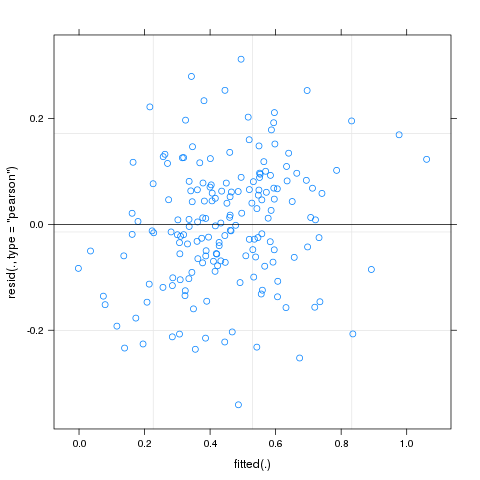

In [30]:
%%R

m = lmer(log(BX_rel) ~  Plant + Treatment + Resid_logCN + 
        Resid_logN   + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Plant, na.rm = TRUE)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print


#         m.lsm = lsmeans(m)
#         m.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
#        # summary(m1.glht)
# m1.cld = cld(m1.glht, level = 0.05)
# old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
# plot(m1.cld)
plot(m)


First, tested model with plant, treatment, plant:treatment, residual SLA, residual logN, residual logB, residual logCN.  Residual logBiomass and logN are colinear, so neither are significant when both are in the model.  Remove log biomass.  logLeafN not significant, remove.  logSLA not significant, remove.  LogCN is more significant when logN is included.  logN is more significant when log CN is included. 
BX_rel ~ Plant + Treatment + Resid_logCN + Resid_logN + Plant:Treatment + (1|Rep) + (1|Rep:Plant). 

Add inorganicN_RE (rhizosphere effect) to parsed down model:
When added residN is still significant, but residLogCN is no longer.  Interestingly, InorganicN_RE is not significant. 

Double checked Inorganic N in case calculation was skewing results.  Still not signficant and has same effect on other terms.  Remove inorganic N from model.  

Residuals are heteroskedastic, log transform.

Interactions of residuals and treatments are not sigificant.  

Best model:
m = lmer(log(BX_rel) ~  Plant + Treatment + Resid_logCN + 
        Resid_logN   + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Plant, na.rm = TRUE)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: log(CB_rel) ~ Plant + Treatment + InorganicN_RE + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: Plant

REML criterion at convergence: 3.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.33711 -0.65342 -0.06261  0.63066  2.15394 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.001340 0.03660 
 Rep       (Intercept) 0.002383 0.04882 
 Residual              0.036417 0.19083 
Number of obs: 86, groups:  Rep:Plant, 44; Rep, 4

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    0.411238   0.079674 35.450000   5.162 9.53e-06 ***
PlantABUTH     0.056728   0.104422 31.420000   0.543   0.5908    
PlantAMAPO     0.042877   0.099367 27.940000   0.431   0.6694    
PlantB97      -0.076585   0.098896 27.620000  -0.774   0.4453    
PlantECHCG     0.016721   0.104754 32.040000   0.160   0.8742

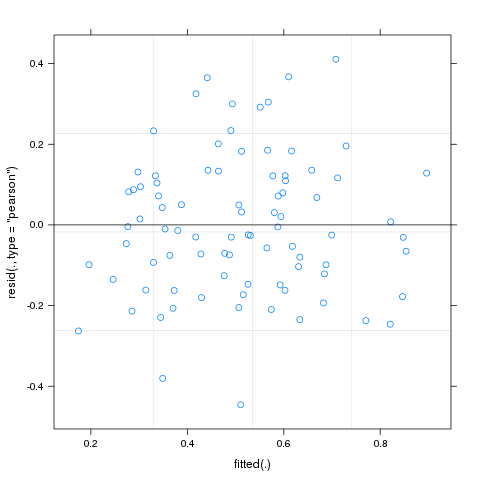

In [31]:
%%R
m = lmer(log(CB_rel) ~  Plant + Treatment + 
          InorganicN_RE + 
         (1|Rep) + (1|Rep:Plant), 
          data = Plant, na.rm = TRUE)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print


#         m.lsm = lsmeans(m)
#         m.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
#        # summary(m1.glht)
# m1.cld = cld(m1.glht, level = 0.05)
# old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
# plot(m1.cld)
plot(m)

Notes:
Follows similar pattern as BX except log transformation may not be necessary.  
If Plant:Treatment is removed InorganicN_RE is marginally significant, but not when Plant is removed

# Nitrogen nutrition index and enzyme activity

In [32]:
%%R
#Creat variables
# W, tons/ha
    Plant$W <- Plant$Biomass_P/17.391

#Subset to just maize
    Maize = filter(Plant, Type == "Maize")
#Create critical N (Nc) variable
    Maize$Nc <- 3.40*Maize$W^-0.37
    Maize$NNI <- Maize$Plant_N/Maize$Nc

### Plot %N by W

In [34]:
%%R
colnames(Maize)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

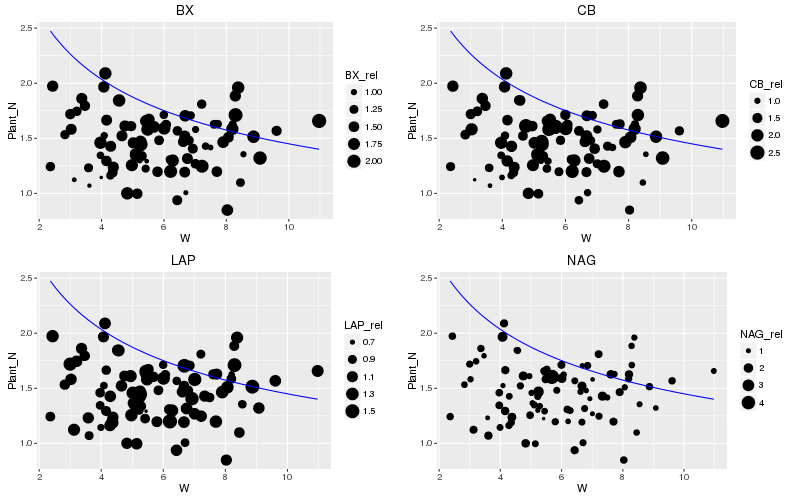

In [41]:
%%R -w 800 -h 500
CriticalN <- function(x) {3.40*x^-0.37}


p = ggplot(Maize, aes(W, Plant_N))
p = p + geom_point(aes(size = BX_rel))
p = p + stat_function(fun = CriticalN, col = "blue")
p = p + ggtitle("BX")


p1 = ggplot(Maize, aes(W, Plant_N))
p1 = p1 + geom_point(aes(size = CB_rel))
p1 = p1 + stat_function(fun = CriticalN, col = "blue")
p1 = p1 + ggtitle("CB")
 

p2 = ggplot(Maize, aes(W, Plant_N))
p2 = p2 + geom_point(aes(size = LAP_rel))
p2 = p2 + stat_function(fun = CriticalN, col = "blue")
p2 = p2 + ggtitle("LAP")
 

p3 = ggplot(Maize, aes(W, Plant_N))
p3 = p3 + geom_point(aes(size = NAG_rel))
p3 = p3 + stat_function(fun = CriticalN, col = "blue")
p3 = p3 + ggtitle("NAG")

grid.arrange(p, p1, p2, p3, ncol = 2)

### Model rel enzyme effect by NNI

In [50]:
%%R
str(anova(fit1)) %>% print
anova(fit1)

Classes ‘anova’ and 'data.frame':	2 obs. of  5 variables:
 $ Df     : int  1 86
 $ Sum Sq : num  1.64 11.5
 $ Mean Sq: num  1.64 0.134
 $ F value: num  12.3 NA
 $ Pr(>F) : num  0.000734 NA
 - attr(*, "heading")= chr  "Analysis of Variance Table\n" "Response: CB_rel"
NULL
Analysis of Variance Table

Response: CB_rel
          Df Sum Sq Mean Sq F value    Pr(>F)    
NNI        1  1.640 1.64001  12.267 0.0007338 ***
Residuals 86 11.498 0.13369                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


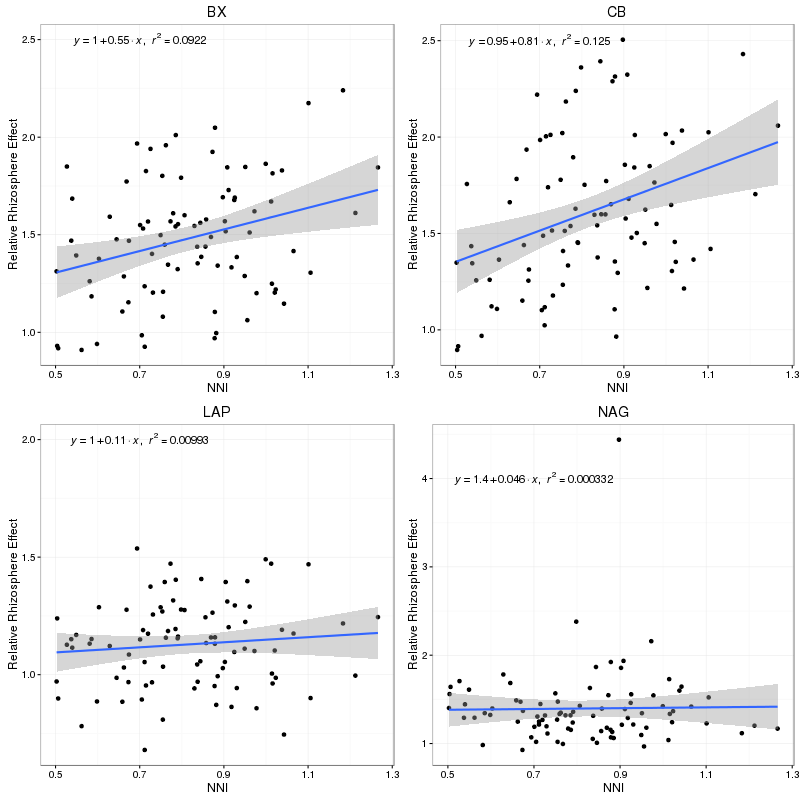

In [69]:
%%R -w 800 -h 800
lm_eqn <- function(m){
    eq <- substitute(italic(y) == a + b %.% italic(x)* 
                     ","~~italic(r)^2~"="~r2, 
         list(a = format(coef(m)[1], digits = 2), 
              b = format(coef(m)[2], digits = 2),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));                 
}

#define subset of data
Mdata = Maize
#Mdata = filter(Maize, Treatment == "Nneg")

fit = lm(BX_rel~NNI, data = Mdata)
fit1 = lm(CB_rel~NNI, data = Mdata)
fit2 = lm(LAP_rel~NNI, data = Mdata)
fit3 = lm(NAG_rel~NNI, data = Mdata)

p = ggplot()
p = p + theme_bw()
p = p + ylab("Relative Rhizosphere Effect")
p = p + xlab("NNI")
p = p + ggtitle("BX")
p = p + geom_point(data = Mdata, aes(NNI, BX_rel))
p = p + stat_smooth(data = Mdata, method = "lm", 
                aes(x = NNI, y = BX_rel), 
                formula = y ~ x, size = 1, na.rm = TRUE)
p =  p + geom_text(aes(x = .7, y = 2.5), label = lm_eqn(fit), parse = TRUE)


p1 = ggplot()
p1 = p1 + theme_bw()
p1 = p1 + ylab("Relative Rhizosphere Effect")
p1 = p1 + xlab("NNI")
p1 = p1 + ggtitle("CB")
p1 = p1 + geom_point(data = Mdata, aes(NNI, CB_rel))
p1 = p1 + stat_smooth(data = Mdata, method = "lm", 
                aes(x = NNI, y = CB_rel), 
                formula = y ~ x, size = 1, na.rm = TRUE)
p1 =  p1 + geom_text(aes(x = .7, y = 2.5), label = lm_eqn(fit1), parse = TRUE)
p1
           
p2 = ggplot()
p2 = p2 + theme_bw()
p2 = p2 + ylab("Relative Rhizosphere Effect")
p2 = p2 + xlab("NNI")
p2 = p2 + ggtitle("LAP")
p2 = p2 + geom_point(data = Mdata, aes(NNI, LAP_rel))
p2 = p2 + stat_smooth(data = Mdata, method = "lm", 
                aes(x = NNI, y = LAP_rel), 
                formula = y ~ x, size = 1, na.rm = TRUE)
p2 =  p2 + geom_text(aes(x = .7, y = 2.0), label = lm_eqn(fit2), parse = TRUE)

p3 = ggplot()
p3 = p3 + theme_bw()
p3 = p3 + ylab("Relative Rhizosphere Effect")
p3 = p3 + xlab("NNI")
p3 = p3 + ggtitle("NAG")
p3 = p3 + geom_point(data = Mdata, aes(NNI, NAG_rel))
p3 = p3 + stat_smooth(data = Mdata, method = "lm", 
                aes(x = NNI, y = NAG_rel), 
                formula = y ~ x, size = 1, na.rm = TRUE)
p3 =  p3 + geom_text(aes(x = .7, y = 4), label = lm_eqn(fit3), parse = TRUE)
p3
grid.arrange(p, p1, p2, p3, ncol = 2)

### Best models

Notes: 
    * Enzyme_rel~NNI + Treatment + (1|Rep) + (1|Plant) + (1|Rep:Plant), data = Maize 
        * 1|Plant contains no variance
        * When treatment is in the model NNI is not significant
        * Also true when analyizing activity_g
        * adding interaction term: 
         - BX:no terms significant 
         - CB: Treatment and NNI signifcant, interaction not
         - LAP: NNI significant, interaction significant at .08
         - NAG: no terms significant
         
   * Enzyme_rel~NNI + (1|Rep) + (1|Plant) + (1|Rep:Plant), data = Maize 
       - BX and CB: NNI highly significant, not significant for LAP and NAG


In [80]:
%%R
fit1 = lmer(BX_rel~NNI + (1|Rep)  + (1|Rep:Plant), data = Maize)
summary(fit1) %>% print

fit2 = lmer(CB_rel~NNI + (1|Rep) + (1|Rep:Plant), data = Maize)
summary(fit2) %>% print

fit3 = lmer(LAP_rel~NNI + (1|Rep)  + (1|Rep:Plant), data = Maize)
summary(fit3) %>% print

fit4 = lmer(NAG_rel~NNI + (1|Rep)  + (1|Rep:Plant), data = Maize)
summary(fit4) %>% print

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: BX_rel ~ NNI + (1 | Rep) + (1 | Rep:Plant)
   Data: Maize

REML criterion at convergence: 33.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.91868 -0.56718  0.02628  0.53396  2.11757 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.030984 0.17602 
 Rep       (Intercept) 0.001531 0.03913 
 Residual              0.055730 0.23607 
Number of obs: 88, groups:  Rep:Plant, 44; Rep, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   0.9906     0.1483 70.6300   6.680  4.6e-09 ***
NNI           0.6008     0.1745 76.0200   3.444 0.000937 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
    (Intr)
NNI -0.960
Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: CB_rel ~ NNI 

* Notes  lm(Enzyme_rel~NNI, data = Maize)
    - adjusted R2 from lm(Enzyme_rel~NNI, data = Maize)
        * BX: .08
        * CB: .11
        * LAP: 0
        * NAG: 0
    - adjusted R2 from lm(Enzyme_rel~Treatment, data = Maize)
        * BX: .1347
        * CB: .2104
        * LAP: 0
        * NAG: .064
            
Conclusion: plants with higher NNI have higher CB and BX rhizosphere effect, but simple N treatment model is actually a better predictor

In [84]:
%%R

fit1 = lm(BX_rel~Treatment, data = Maize)
summary(fit1) %>% print

fit2 = lm(CB_rel~Treatment, data = Maize)
summary(fit2) %>% print

fit3 = lm(LAP_rel~Treatment, data = Maize)
summary(fit3) %>% print

fit4 = lm(NAG_rel~Treatment, data = Maize)
summary(fit4) %>% print


Call:
lm(formula = BX_rel ~ Treatment, data = Maize)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62783 -0.19919 -0.01383  0.19721  0.64695 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.36415    0.04331  31.498  < 2e-16 ***
TreatmentNpos  0.23360    0.06125   3.814 0.000257 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2873 on 86 degrees of freedom
Multiple R-squared:  0.1447,	Adjusted R-squared:  0.1347 
F-statistic: 14.55 on 1 and 86 DF,  p-value: 0.0002567


Call:
lm(formula = CB_rel ~ Treatment, data = Maize)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6831 -0.2481 -0.0579  0.2203  0.8117 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.42797    0.05206  27.430  < 2e-16 ***
TreatmentNpos  0.36200    0.07362   4.917 4.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.